# Time Series Forecasting (MultiVariate Analysis)

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR

from sklearn.metrics import mean_squared_error
from math import sqrt

color_pal = sns.color_palette()


In [2]:
# Reading data
data = pd.read_csv('timeseriesdata.csv')
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

data.head()


,subject1,subject2,subject3,subject4,subject5,subject6,subject7,subject8,subject9,subject10,...,subject15,subject16,subject17,subject18,subject19,subject20,subject21,subject22,subject23,subject24
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-30,0.0,4.0,4.0,3.0,4.0,4.0,2.7,0.0,2.7,3.7,...,0.0,3.0,0.0,4.0,0.0,3.3,4.0,2.7,2.7,4.0
2015-05-30,3.0,3.0,1.7,2.7,3.7,4.0,3.0,0.0,0.0,0.0,...,2.7,0.0,0.0,3.3,2.7,3.3,3.7,3.7,3.0,4.0
2015-05-30,4.0,2.7,2.0,3.3,3.0,4.0,4.0,2.0,0.0,3.0,...,3.0,3.3,2.0,3.0,3.7,3.3,3.0,2.7,3.0,3.7
2015-05-30,4.0,2.7,3.7,3.0,4.0,4.0,3.7,4.0,2.7,4.0,...,3.0,4.0,3.7,4.0,4.0,3.7,4.0,4.0,3.3,4.0
2015-05-30,2.7,3.0,3.0,2.7,3.7,4.0,1.7,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.7,3.3,2.7,0.0,3.3


In [3]:
data.tail()


,subject1,subject2,subject3,subject4,subject5,subject6,subject7,subject8,subject9,subject10,...,subject15,subject16,subject17,subject18,subject19,subject20,subject21,subject22,subject23,subject24
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-30,2.985015,3.004995,1.711489,2.701499,3.701499,4.0,2.998501,0.0,0.013487,0.018482,...,2.686513,0.014985,0.0,3.303497,2.686513,3.3,3.701499,3.695005,2.998501,4.0
2016-12-30,2.988012,3.003996,1.709191,2.701199,3.701199,4.0,2.998801,0.0,0.010789,0.014785,...,2.689211,0.011988,0.0,3.302797,2.689211,3.3,3.701199,3.696004,2.998801,4.0
2016-12-30,2.991009,3.002997,1.706893,2.700899,3.700899,4.0,2.999101,0.0,0.008092,0.011089,...,2.691908,0.008991,0.0,3.302098,2.691908,3.3,3.700899,3.697003,2.999101,4.0
2016-12-30,2.994006,3.001998,1.704595,2.700599,3.700599,4.0,2.999401,0.0,0.005395,0.007393,...,2.694605,0.005994,0.0,3.301399,2.694605,3.3,3.700599,3.698002,2.999401,4.0
2016-12-30,2.997003,3.000999,1.702298,2.700300,3.700300,4.0,2.999700,0.0,0.002697,0.003696,...,2.697303,0.002997,0.0,3.300699,2.697303,3.3,3.700300,3.699001,2.999700,4.0


<Axes: title={'center': 'scores'}, xlabel='Date'>

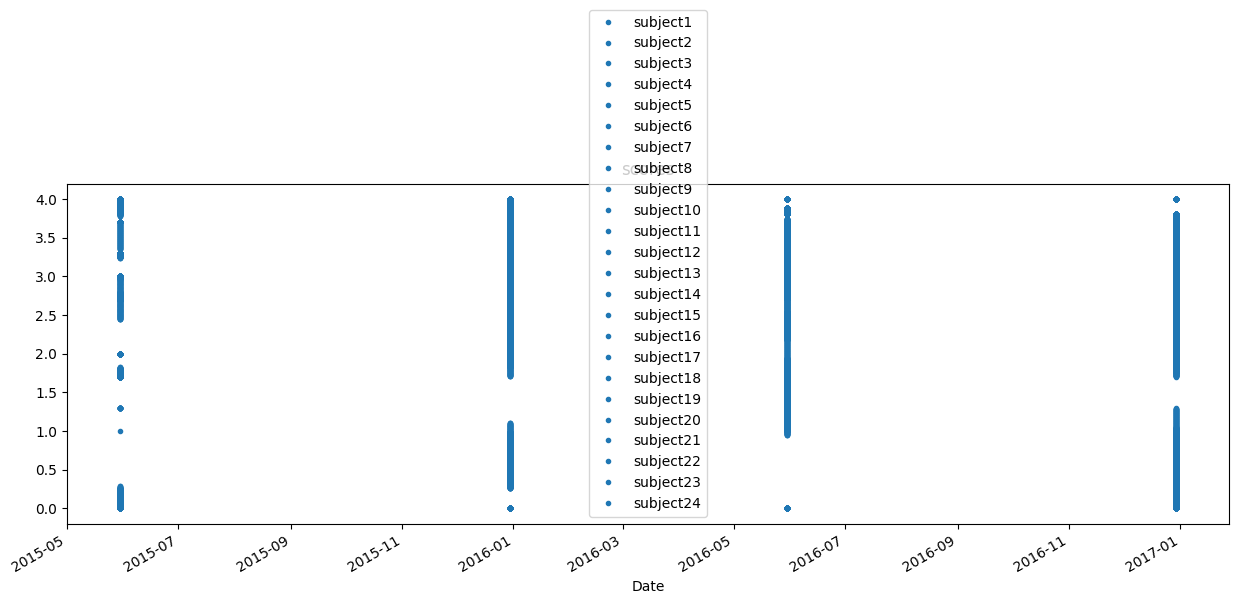

In [4]:
data.plot(style='.', figsize=(15,5), color = color_pal[0], title='scores')


In [5]:
# Splitting the data into training and testing sets

train_size = int(len(data) * 0.8)  
train_data, test_data = data[:train_size], data[train_size:]

# Train the VAR model

model = VAR(train_data)
model_fit = model.fit()

# Make predictions on the test set

predictions = model_fit.forecast(model_fit.endog, steps=len(test_data))



# Convert the predictions into a DataFrame

pred_df = pd.DataFrame(predictions, index=test_data.index, columns=data.columns)



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
# Evaluate the model using Root Mean Squared Error (RMSE)

rmse = sqrt(mean_squared_error(test_data.values, pred_df.values))
print('RMSE:', rmse)



# Predict the scores for the next semester

future_steps = 1  # Number of future steps to predict
future_predictions = model_fit.forecast(model_fit.endog, steps=future_steps)
future_pred_df = pd.DataFrame(future_predictions, columns=data.columns)



# Print the predicted scores for the next semester

print('Predicted Scores for the Next Semester:')
print(future_pred_df)


RMSE: 0.778915171492524
Predicted Scores for the Next Semester:
   subject1  subject2  subject3  subject4  subject5  subject6  subject7   
0  2.266912  3.237019  2.309079  2.783515  3.719147  3.999695  2.965649  \

   subject8  subject9  subject10  ...  subject15  subject16  subject17   
0  0.103253  0.703592   0.982903  ...   2.082481   0.795682   0.071013  \

   subject18  subject19  subject20  subject21  subject22  subject23  subject24  
0   3.463303   2.044429   3.306181   3.752134   3.427791   2.913814   3.997097  

[1 rows x 24 columns]
